In [1]:
import os
import sys
import gensim
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

ROOT = os.path.dirname(os.getcwd())
#path_data = os.path.join(ROOT, 'data')
path_data = 'C:\\Users\\joris\\Documents\\eScience_data\\data'
sys.path.insert(0, ROOT)
sys.path.insert(0, "C:\\Users\\joris\\Documents\\eScience_data\\spec2vec_gnps_data_analysis\\custom_functions")

In [2]:
#loading test set
outfile = os.path.join(path_data, 'new_and_unique2_found_matches_s2v.pickle')
print(outfile)
if os.path.exists(outfile):
    with open(outfile, 'rb') as inf:
        new_and_unique2_found_matches_s2v = pickle.load(inf)
else:
    print('error')

outfile = os.path.join(path_data, 'new_and_unique2_documents_library_s2v.pickle')
print(outfile)
if os.path.exists(outfile):
    with open(outfile, 'rb') as inf:
        new_and_unique2_documents_library_s2v = pickle.load(inf)
else:
    print('error')

outfile = os.path.join(path_data, 'new_and_unique2_documents_query_s2v.pickle')
print(outfile)
if os.path.exists(outfile):
    with open(outfile, 'rb') as inf:
        new_and_unique2_documents_query_s2v = pickle.load(inf)
else:
    print('error')

C:\Users\joris\Documents\eScience_data\data\new_and_unique2_found_matches_s2v.pickle
C:\Users\joris\Documents\eScience_data\data\new_and_unique2_documents_library_s2v.pickle
C:\Users\joris\Documents\eScience_data\data\new_and_unique2_documents_query_s2v.pickle


In [3]:
#test data with predictions from NN predicting tanimoto from notebook 2
outfile = os.path.join(path_data, 'nn_tested_tanimoto_top20_new_and_unique2_found_matches_s2v.pickle')
print(outfile)
if os.path.exists(outfile):
    with open(outfile, 'rb') as inf:
        nn_tested_tanimoto_top20_new_and_unique2_found_matches_s2v = pickle.load(inf)
else:
    print('error')

C:\Users\joris\Documents\eScience_data\data\nn_tested_tanimoto_top20_new_and_unique2_found_matches_s2v.pickle


In [4]:
nn_tested_tanimoto_top20_new_and_unique2_found_matches_s2v[206].sort_values('s2v_score',ascending=False).iloc[:20]

,cosine_score,cosine_matches,mod_cosine_score,mod_cosine_matches,s2v_score,label,similarity,parent_mass,mass_sim,sim_predictions,guess_within_thresh
60239,0.000000,0.000000,0.000000,0.000000,0.563774,0,0.191806,0.016179,4.057758e-55,0.089114,[False]
60243,0.000000,0.000000,0.000000,0.000000,0.563758,0,0.191806,0.016179,4.057758e-55,0.089117,[False]
18072,0.003423,0.070000,0.003423,0.070000,0.557384,0,0.191806,0.016179,4.056852e-55,0.128712,[True]
60244,0.000000,0.000000,0.000000,0.000000,0.555429,0,0.191806,0.016179,4.057758e-55,0.090505,[False]
60240,0.000000,0.000000,0.000000,0.000000,0.553330,0,0.191806,0.016179,4.057758e-55,0.090855,[False]
60245,0.000000,0.000000,0.000000,0.000000,0.548380,0,0.191806,0.016179,4.057758e-55,0.091680,[False]
60241,0.000000,0.000000,0.000000,0.000000,0.547144,0,0.191806,0.016179,4.057758e-55,0.091886,[True]
18258,0.000019,0.070000,0.000019,0.070000,0.544228,0,0.191806,0.016179,4.056852e-55,0.128853,[True]
60246,0.000000,0.000000,0.000000,0.000000,0.540842,0,0.191806,0.016179,4.057758e-55,0.092936,[True]
60242,0.000000,0.000000,0.000000,0.000000,0.538202,0,0.191806,0.016179,4.057758e-55,0.093377,[True]


Inchikeys are matching: False
Parent masses: 778.3567235480093 217.09672354800927 217.09672354800927


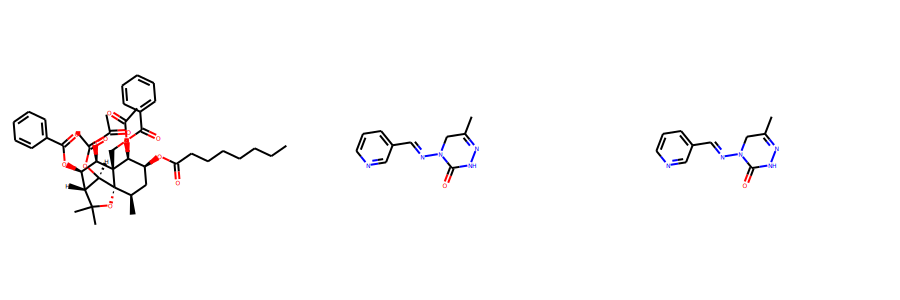

In [5]:
smiles1 = new_and_unique2_documents_query_s2v[206]._obj._metadata.get("smiles")
smiles2 = new_and_unique2_documents_library_s2v[60239]._obj._metadata.get("smiles")
smiles3 = new_and_unique2_documents_library_s2v[60243]._obj._metadata.get("smiles")

from rdkit import Chem, DataStructs
ms = [Chem.MolFromSmiles(smiles1), Chem.MolFromSmiles(smiles2), Chem.MolFromSmiles(smiles3)]
fps = [Chem.RDKFingerprint(x) for x in ms]
print("Inchikeys are matching:",
      new_and_unique2_documents_query_s2v[206]._obj._metadata.get("inchikey") == new_and_unique2_documents_library_s2v[60239]._obj._metadata.get("inchikey"))
print("Parent masses:",
      new_and_unique2_documents_query_s2v[206]._obj._metadata.get("parent_mass"),
      new_and_unique2_documents_library_s2v[60239]._obj._metadata.get("parent_mass"),
      new_and_unique2_documents_library_s2v[60243]._obj._metadata.get("parent_mass"))
img = Chem.Draw.MolsToGridImage(ms, molsPerRow=3, subImgSize=(300, 300), maxMols=len(ms),
                           legends=None, useSVG=True)
img

In [6]:
test = nn_tested_tanimoto_top20_new_and_unique2_found_matches_s2v[1].sort_values('s2v_score',ascending=False).iloc[:20].copy()
test_ids = list(test.index)
test.to_dict(orient='index')

{66196: {'cosine_score': 0.997898426467604,
  'cosine_matches': 0.637956062310092,
  'mod_cosine_score': 0.997898426467604,
  'mod_cosine_matches': 0.637956062310092,
  's2v_score': 0.8396949879794174,
  'label': 1,
  'similarity': 1.0,
  'parent_mass': 0.041979814687625495,
  'mass_sim': 1.0,
  'sim_predictions': 0.9732656478881836,
  'guess_within_thresh': array([ True])},
 65988: {'cosine_score': 0.4422130139751372,
  'cosine_matches': 0.5814037025206291,
  'mod_cosine_score': 0.4422130139751372,
  'mod_cosine_matches': 0.5814037025206291,
  's2v_score': 0.6209841519964705,
  'label': 1,
  'similarity': 1.0,
  'parent_mass': 0.041979814687625495,
  'mass_sim': 1.0,
  'sim_predictions': 0.9250761270523071,
  'guess_within_thresh': array([ True])},
 67788: {'cosine_score': 0.9730568456286967,
  'cosine_matches': 0.5814037025206291,
  'mod_cosine_score': 0.9730568456286962,
  'mod_cosine_matches': 0.5814037025206291,
  's2v_score': 0.5986417074792667,
  'label': 1,
  'similarity': 1.0,

In [7]:
#how many lib_ids match one or more queries?
all_matching_ids = set(lib_id for query in nn_tested_tanimoto_top20_new_and_unique2_found_matches_s2v \
                    for lib_id in query.sort_values(by='s2v_score',ascending=False).iloc[:20].index)
len(all_matching_ids), len(all_matching_ids)*len(all_matching_ids)
#that is a bit too many IDs to make a all vs all so have to do it per query as thats only 20*20*2000=800,000 comparisons

(24015, 576720225)

In [8]:
#make all vs all tanimoto comparison of all matches for each query
from rdkit import Chem, DataStructs

outfile = os.path.join(path_data, 'similarity_matrices_new_and_unique2.pickle')
print(outfile)
if os.path.exists(outfile):
    with open(outfile, 'rb') as inf:
        similarity_matrices_new_and_unique2 = pickle.load(inf)
else:
    #for each matches df make a similarity matrix based on tanimoto
    similarity_matrices_new_and_unique2 = []
    topn = 20

    for ID in range(len(new_and_unique2_found_matches_s2v)):
        df = new_and_unique2_found_matches_s2v[ID].sort_values(by=['s2v_score'], ascending = False).iloc[:topn]
        library_ids = df.index.values
        rows = []
        for lib_id_i in library_ids:
            smiles_i = new_and_unique2_documents_library_s2v[lib_id_i]._obj.get("smiles")

            if not smiles_i or smiles_i == "None": # check that lib_id_i smiles exist
                rows.append([0] * len(library_ids)) #default to all 0 if it doesnt exist
                continue
            ms_i = Chem.MolFromSmiles(smiles_i)
            if not ms_i: #in case something is wrong with smiles
                rows.append([0] * len(library_ids)) #default to all 0 if it doesnt exist
                continue
            fp_i = Chem.RDKFingerprint(ms_i)

            row = []
            for lib_id_j in library_ids:
                smiles_j = new_and_unique2_documents_library_s2v[lib_id_j]._obj.get("smiles")

                if smiles_j and smiles_j != "None":
                    ms_j = Chem.MolFromSmiles(smiles_j)
                    if ms_j:
                        fp_j = Chem.RDKFingerprint(ms_j)
                        score = DataStructs.FingerprintSimilarity(fp_i, fp_j)
                    else: #in case something is wrong with smiles
                        score = 0
                else: #in case it doesnt have smiles
                    score = 0
                row.append(score)

            rows.append(row)
        similarity_matrices_new_and_unique2.append(pd.DataFrame(rows))
    #write to file    
    with open(outfile, 'wb') as outf:
        pickle.dump(similarity_matrices_new_and_unique2, outf)

C:\Users\joris\Documents\eScience_data\data\similarity_matrices_new_and_unique2.pickle


In [9]:
similarity_matrices_new_and_unique2[1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,1.000000,1.000000,1.000000,0.411520,0.423473,1.000000,0.090494,0.067490,0.202258,0.226569,0.202258,0.385201,0.430307,0.430307,0.430307,0.202258,0.320816,0.125000,0.344958
1,1.000000,1.000000,1.000000,1.000000,0.411520,0.423473,1.000000,0.090494,0.067490,0.202258,0.226569,0.202258,0.385201,0.430307,0.430307,0.430307,0.202258,0.320816,0.125000,0.344958
2,1.000000,1.000000,1.000000,1.000000,0.411520,0.423473,1.000000,0.090494,0.067490,0.202258,0.226569,0.202258,0.385201,0.430307,0.430307,0.430307,0.202258,0.320816,0.125000,0.344958
3,1.000000,1.000000,1.000000,1.000000,0.411520,0.423473,1.000000,0.090494,0.067490,0.202258,0.226569,0.202258,0.385201,0.430307,0.430307,0.430307,0.202258,0.320816,0.125000,0.344958
4,0.411520,0.411520,0.411520,0.411520,1.000000,0.435327,0.411520,0.133142,0.065072,0.252964,0.212490,0.252964,0.348444,0.401126,0.401126,0.401126,0.252964,0.446043,0.119234,0.335352
5,0.423473,0.423473,0.423473,0.423473,0.435327,1.000000,0.423473,0.098832,0.067593,0.175202,0.210568,0.175202,0.359866,0.370445,0.370445,0.370445,0.175202,0.323695,0.131399,0.324523
6,1.000000,1.000000,1.000000,1.000000,0.411520,0.423473,1.000000,0.090494,0.067490,0.202258,0.226569,0.202258,0.385201,0.430307,0.430307,0.430307,0.202258,0.320816,0.125000,0.344958
7,0.090494,0.090494,0.090494,0.090494,0.133142,0.098832,0.090494,1.000000,0.187773,0.062189,0.073892,0.062189,0.095057,0.126347,0.126347,0.126347,0.062189,0.200313,0.042155,0.068287
8,0.067490,0.067490,0.067490,0.067490,0.065072,0.067593,0.067490,0.187773,1.000000,0.043860,0.040998,0.043860,0.060784,0.081081,0.081081,0.081081,0.043860,0.097638,0.033058,0.047912
9,0.202258,0.202258,0.202258,0.202258,0.252964,0.175202,0.202258,0.062189,0.043860,1.000000,0.107946,1.000000,0.171402,0.208415,0.208415,0.208415,1.000000,0.429530,0.104167,0.250620


In [10]:
#make a network for one query connecting library matches with tanimoto
def matches2network(query_id, matches):
    '''Return a networkx network connecting query_id to all matches
    
    query_id: anything that can be turned into a string with str()
    matches: pandas DataFrame, matches to query with match info as columns
    
    s2v_score and similarity predictions can be added as attributes
    '''
    G = nx.Graph() #initialise undrected graph
    query_node = 'query_' + str(query_id)
    lib_ids = matches.index
    #add all columns from matches to edge attributes
    att_dicts = matches.to_dict(orient = 'index')
    #add edges (and nodes implicitly) from query to all matches
    edge_list = []
    for lib_id in lib_ids:
        edge_list.append((query_node, lib_id, att_dicts[lib_id]))
    G.add_edges_from(edge_list)
    return G

In [11]:
def add_library_connections(G, similarity_matrix, lib_ids):
    '''Add tanimoto similarity as edges between all library matches in the input graph
    
    G: networkx graph
    similarity_matrix: pd DataFrame, all vs all matrix containing tanimoto similarity
        of library matches to each other
    lib_ids: list of hashable, ids of the items in the matrix
    
    Assumes that lib_ids names correspond in order to similarity_matrix
    '''
    matrix = np.array(similarity_matrix)
    edge_list = []
    for i, id_i in enumerate(lib_ids[:-1]):
        for j, id_j in enumerate(lib_ids[i+1:]):
            edge_list.append((id_i, id_j, {'tanimoto': matrix[i,j+i+1]}))
    G.add_edges_from(edge_list)
    return G

In [12]:
ID = 0
network_0 = matches2network(ID,
                            nn_tested_tanimoto_top20_new_and_unique2_found_matches_s2v[ID]\
                            .sort_values('s2v_score',ascending=False).iloc[:20])
network_0 = add_library_connections(network_0, similarity_matrices_new_and_unique2[ID],
                        nn_tested_tanimoto_top20_new_and_unique2_found_matches_s2v[ID]\
                        .sort_values('s2v_score', ascending=False).iloc[:20].index)

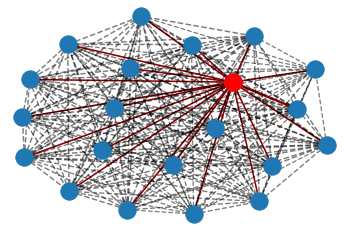

In [13]:
cutoff = 0.4
width_default = 3
tan_cutoff = 0.6

pos = nx.spring_layout(network_0)
# nx.draw(network_0,pos)
# nx.draw_networkx_edge_labels(network_0,pos,edge_labels=labels)
nx.draw_networkx_nodes(network_0,pos)
nx.draw_networkx_nodes(network_0,pos, nodelist=['query_0'], node_color = 'red')
s2v_labels = nx.get_edge_attributes(network_0,'s2v_score')
for edge in s2v_labels.keys():
    #introduce cutoff and multiply with width multiplier
    val = s2v_labels[edge]
    if val > cutoff:
        width = val * width_default
        nx.draw_networkx_edges(network_0,pos,edgelist=[edge],width=width,edge_color='darkred')
tan_labels = nx.get_edge_attributes(network_0,'tanimoto')
for edge in tan_labels.keys():
    #introduce cutoff and multiply with width multiplier
    val = tan_labels[edge]
    if val > tan_cutoff:
        width = val * width_default
        nx.draw_networkx_edges(network_0,pos,edgelist=[edge],width=width/2,alpha=0.5, style="dashed")
plt.axis('off')
plt.show()

In [35]:
from matplotlib import cm
def plot_graph(G, attribute_key = 's2v_score', cutoff = 0.4, tan_cutoff = 0.6, node_labels = False,
               save = False):
    '''Plot graph G with special edges
    
    G: networkx Graph
    attribute_key: str, the name of the attribute for which you want to make a selection
        either s2v_score or sim_predictions
    cutoff: float, cutoff for the attribute
    tan_cutoff: float, cutoff for the tanimoto score of the library matches vs each other
    node_labels: bool, display node labels
    save: str, file name to save plot
    '''
    width_default = 3
    
    #making selection based on attribute cutoffs
    library_edges = [(u,v,d) for u,v,d in G.edges(data=True) if 'tanimoto' in d]
    library_edges = [(u,v,d) for u,v,d in library_edges if d['tanimoto'] >= tan_cutoff]
    query_edges = [(u,v,d) for u,v,d in G.edges(data=True) if not 'tanimoto' in d and \
                     d[attribute_key] >= cutoff]
    if not query_edges:
        print('No matches above cutoff.')
        return
    Gsub = nx.Graph(library_edges+query_edges)
    
    pos = graphviz_layout(Gsub, prog="neato")
#     pos = nx.spring_layout(G)
    
    nx.draw_networkx_nodes(Gsub,pos)
    q_node = [node for node in Gsub.nodes if isinstance(node, str) and 'query' in node][0]
    cmap = cm.get_cmap('Reds', 100)
    #give query node darkest colour
    darkest = cmap(1.0)
    nx.draw_networkx_nodes(Gsub, pos, nodelist=[q_node], node_color = [darkest])

    attr_labels = nx.get_edge_attributes(Gsub, attribute_key)
    for edge in attr_labels.keys():
        #introduce cutoff and multiply with width multiplier
        val = attr_labels[edge]
        if val > cutoff:
            width = val * width_default
            nx.draw_networkx_edges(Gsub, pos, edgelist=[edge], width=width, edge_color=cmap(val))

    tan_labels = nx.get_edge_attributes(Gsub,'tanimoto')
    for edge in tan_labels.keys():
        #introduce cutoff and multiply with width multiplier
        val = tan_labels[edge]
        if val > tan_cutoff:
            width = val * width_default
            nx.draw_networkx_edges(Gsub,pos,edgelist=[edge],width=width/2, style="dashed")
    if node_labels:
        nx.draw_networkx_labels(Gsub, pos, font_size=5.5)
    plt.axis('off')
    if save:
        plt.savefig(save)
    else:
        plt.show()
    plt.close()

867


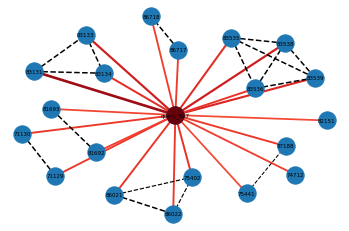

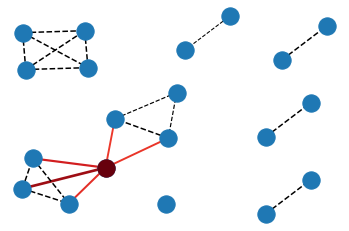

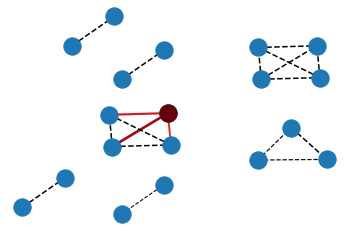

206


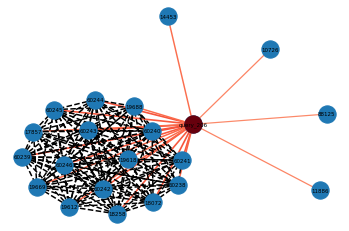

No matches above cutoff.


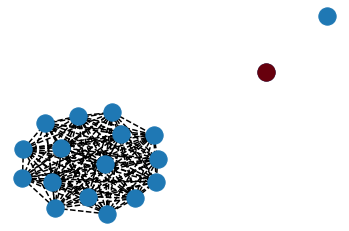

1725


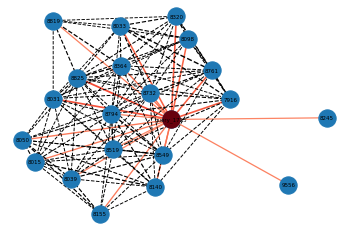

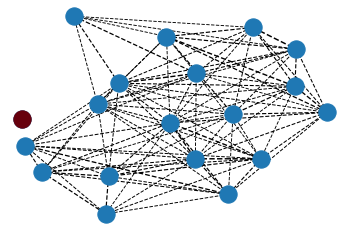

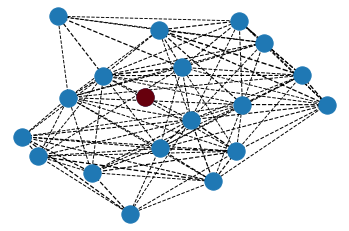

998


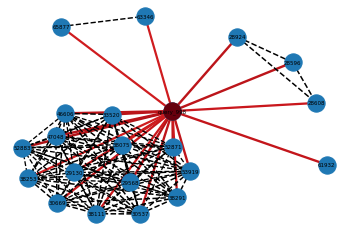

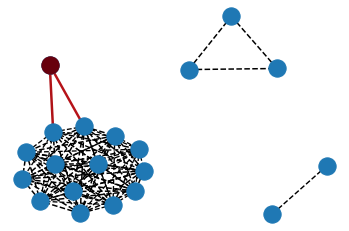

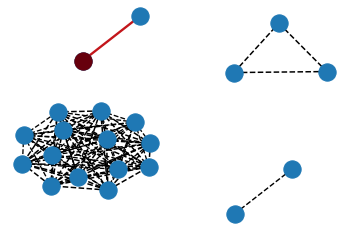

1142


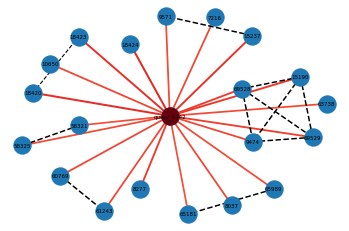

No matches above cutoff.
No matches above cutoff.
1424


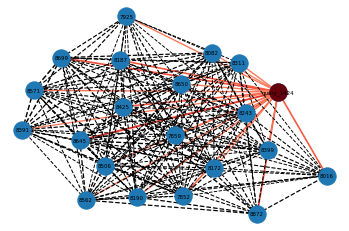

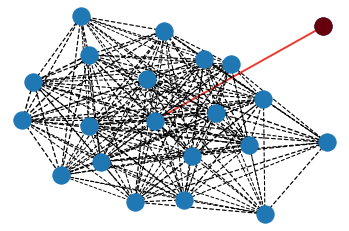

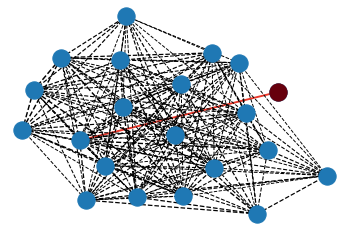

73


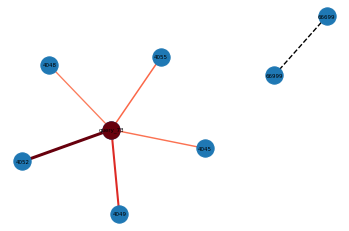

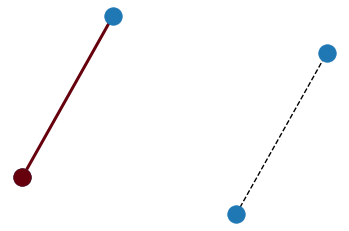

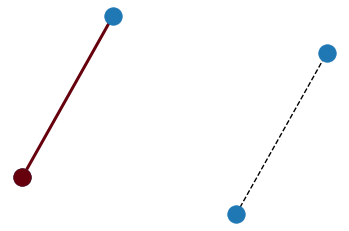

1032


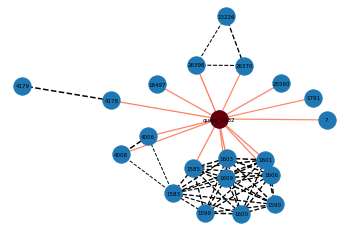

No matches above cutoff.


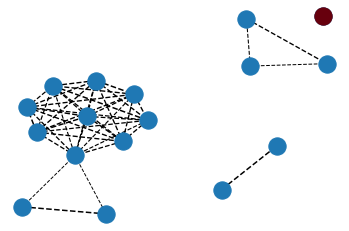

740


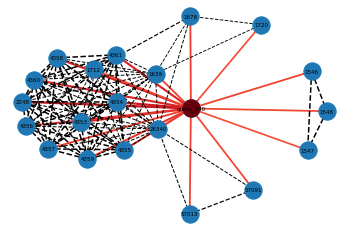

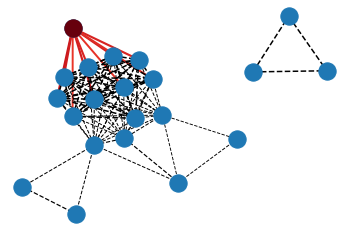

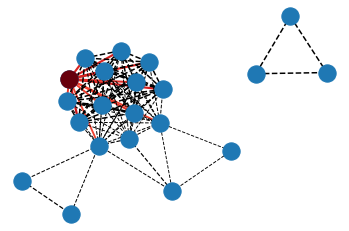

1767


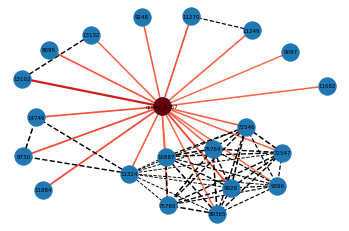

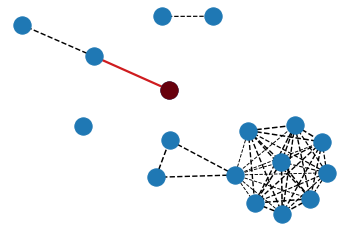

No matches above cutoff.


In [15]:
topn = 20
np.random.seed(5)
for ID in np.random.choice(range(len(nn_tested_tanimoto_top20_new_and_unique2_found_matches_s2v)), 10):
#     ID = 1402
# for ID in range(len(nn_tested_tanimoto_top20_new_and_unique2_found_matches_s2v)):
    print(ID)
    test_graph = matches2network(ID,
                                nn_tested_tanimoto_top20_new_and_unique2_found_matches_s2v[ID]\
                                .sort_values('s2v_score',ascending=False).iloc[:topn])
    test_graph = add_library_connections(test_graph, similarity_matrices_new_and_unique2[ID],
                            nn_tested_tanimoto_top20_new_and_unique2_found_matches_s2v[ID]\
                            .sort_values('s2v_score', ascending=False).iloc[:topn].index)

    plot_graph(test_graph, tan_cutoff = 0.6, node_labels = True)
    plot_graph(test_graph, tan_cutoff = 0.6, attribute_key = 'sim_predictions', cutoff = 0.6)
    plot_graph(test_graph, tan_cutoff = 0.6, attribute_key = 'similarity', cutoff = 0.6)

In [16]:
from matplotlib import cm
colours = cm.get_cmap('Reds', 100)
colours(np.linspace(0, 1, 100))[-1], colours(1.0)

(array([0.40392157, 0.        , 0.05098039, 1.        ]),
 (0.403921568627451, 0.0, 0.05098039215686274, 1.0))

In [17]:
gradient = np.linspace(0, 1, 100)
gradient = np.vstack((gradient,gradient))
fig, ax = plt.subplots(figsize=(3,1))
ax.imshow(gradient, cmap=colours)
pos = list(ax.get_position().bounds)
x_text = pos[0] - 0.01
y_text = pos[1] + pos[3]/2.
ax.text(x_text, y_text, 's2v_score', va='center', ha='right', fontsize=10)
ax.set_axis_off()

## Transmissions

1


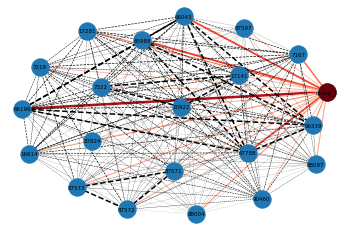

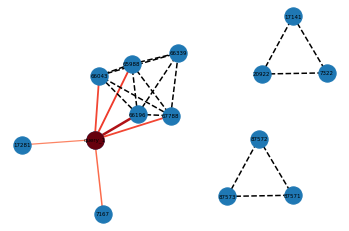

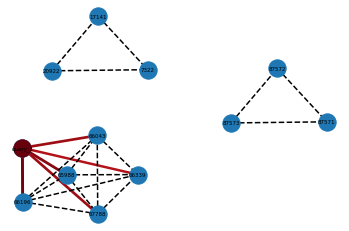

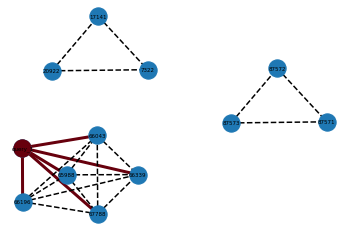

In [37]:
#test case
ID = 1
topn = 20
print(ID)
test_G = matches2network(ID, nn_tested_tanimoto_top20_new_and_unique2_found_matches_s2v[ID]\
                         .sort_values('s2v_score',ascending=False).iloc[:topn])
test_G = add_library_connections(test_G, similarity_matrices_new_and_unique2[ID],
                                 nn_tested_tanimoto_top20_new_and_unique2_found_matches_s2v[ID]\
                                 .sort_values('s2v_score', ascending=False).iloc[:topn].index)

save_file = os.path.join(path_data, 'graph_19-10_id{}.svg'.format(ID))
plot_graph(test_G, tan_cutoff = 0, attribute_key = 's2v_score', cutoff = 0, node_labels = True)
plot_graph(test_G, tan_cutoff = 0.6, attribute_key = 's2v_score', cutoff = 0.4, node_labels = True) #, save=save_file)
plot_graph(test_G, tan_cutoff = 0.6, attribute_key = 'sim_predictions', cutoff = 0.6, node_labels = True)
plot_graph(test_G, tan_cutoff = 0.6, attribute_key = 'similarity', cutoff = 0.6, node_labels = True)

In [34]:
nn_tested_tanimoto_top20_new_and_unique2_found_matches_s2v[ID].sort_values('s2v_score',ascending=False).iloc[:topn]

,cosine_score,cosine_matches,mod_cosine_score,mod_cosine_matches,s2v_score,label,similarity,parent_mass,mass_sim,sim_predictions,guess_within_thresh
45439,0.792853,0.195643,0.792853,0.195643,0.814472,0,0.947368,0.061835,1.000000e+00,0.987762,[True]
32666,0.000000,0.000000,0.000000,0.000000,0.606157,0,1.000000,0.061685,6.378614e-01,0.710993,[False]
36488,0.122287,0.070000,0.122721,0.135100,0.570656,0,1.000000,0.061535,4.067764e-01,0.537015,[False]
46660,0.010289,0.070000,0.010289,0.070000,0.559132,1,1.000000,0.061835,1.000000e+00,0.977339,[True]
30026,0.000017,0.070000,0.011877,0.135100,0.550621,0,1.000000,0.061685,6.378614e-01,0.666530,[False]
31738,0.000079,0.070000,0.000103,0.135100,0.549179,0,1.000000,0.061535,4.067764e-01,0.622985,[False]
36127,0.000000,0.000000,0.000000,0.000000,0.545615,0,1.000000,0.068102,7.086787e-09,0.491049,[False]
46256,0.285278,0.135100,0.285278,0.135100,0.538457,0,1.000000,0.063624,4.722366e-03,0.485759,[False]
31390,0.018739,0.135100,0.018739,0.135100,0.537693,0,1.000000,0.065713,9.069393e-06,0.477826,[False]
45802,0.000032,0.070000,0.000032,0.070000,0.536057,0,1.000000,0.061685,6.378614e-01,0.639795,[False]


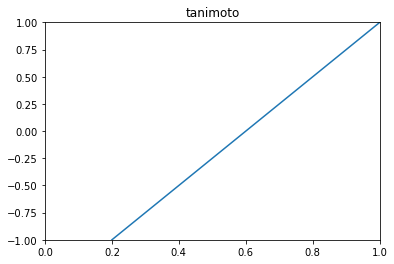

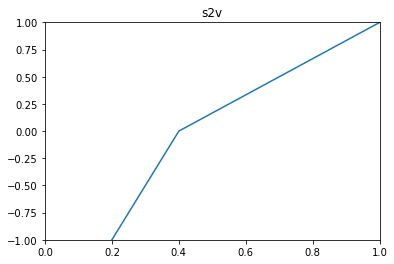

In [20]:
cutoff = 0.6
ys = [-1, 0, 1]
xs = [0.2, cutoff, 1]
plt.plot(xs, ys)
plt.ylim(-1,1)
plt.xlim(0,1)
plt.title('tanimoto')
plt.show()
cutoff = 0.4
ys = [-1, 0, 1]
xs = [0.2, cutoff, 1]
plt.plot(xs, ys)
plt.ylim(-1,1)
plt.xlim(0,1)
plt.title('s2v')
plt.show()

In [21]:
(0.3 - 0.6) / (0.6 - 0.2)

-0.75

In [22]:
def tr_tan(v, n, graph, cutoff = 0.6, low_cutoff = 0.2):
    '''Tanimoto 'transmission' transforming tanimoto_score(v,n) between -1, 1
    
    v: hashable, starting point node name, probably str or int
    n: hashable, end point node name, probably str or int
    graph: networkx graph
    cutoff: float, determines 0, above and below values will be
        transformed to 1 - 0, and -1 - 0, respectively
    low_cutoff: float, determines -1 transmission value. values between
        cutoff and low_cutoff will be transformed to -1 - 0.
    '''
    tan = graph[v][n]['tanimoto']
    if tan >= cutoff:
        transformed = (tan - cutoff) / (1 - cutoff) #between 0 - 1
    elif tan < low_cutoff:
        transformed = 0
    else:
        transformed = (tan - cutoff) / (cutoff - low_cutoff) #between -1 - 0
    return transformed

def tr_s2v(n, q, graph, cutoff = 0.4, low_cutoff = 0.2):
    '''
    Transforms s2v score of given node to query between -1, 1
    
    n: hashable, node name of library match, probably str or int
    q: str, query node name
    graph: networkx graph
    cutoff: float, determines 0, above and below values will be
        transformed to 1 - 0, and -1 - 0, respectively
    '''
    s2v = graph[n][q]['s2v_score']
    if s2v >= cutoff:
        transformed = (s2v - cutoff) / (1 - cutoff)
    elif s2v < low_cutoff:
        transformed = 0
    else:
        transformed = (s2v - cutoff) / (cutoff - low_cutoff) #between -1 - 0
    return transformed

def tr_node(v, graph, tan_cutoff = 0.6, s2v_cutoff = 0.4):
    '''Calculates transmission of node v in the graph
    
    v: hashable, node name of which to calculate transmission, probably str or int
    graph: networkx graph
    tan_cutoff, s2v_cutoff: float, determines 0 for either tanimoto cutoff or s2v cutoff,
        above and below values will be transformed to 1 - 0, and -1 - 0, respectively
    
    Is calculated as Tr_node_v = Sum_over_all_nodes_n(Tr_tan(v,n) * Tr_s2v(n,q))
    '''
    q_node = [node for node in graph.nodes if isinstance(node, str) and 'query' in node][0]
    nodes_n = [node for node in graph.nodes if not node == q_node and not node == v]
    tr_individuals = [tr_tan(v, n, graph, tan_cutoff) * tr_s2v(n, q_node, graph, s2v_cutoff) for n in nodes_n]
#     print(tr_individuals)
    tr_node_v = sum(tr_individuals)
    return tr_node_v

# print(tr_tan(17281, 65988, test_G), tr_s2v(65988, 'query_1', test_G), tr_tan(17281, 65988, test_G) * tr_s2v(65988, 'query_1', test_G))
# tr_node(17281, test_G)

66196 4.284089372785733
65988 4.648607432757311
67788 4.6858448402859825
66043 4.6858448402859825
7167 2.448920671478452
17281 1.630261184861902
66339 5.102699796856363
88004 0.6316408246046001
87824 0.0
87573 -0.33284291574802327
88097 -0.4696746921897297
87572 -0.21639583626932146
16614 0.7691812648054384
20922 0.4342188539814268
17141 0.49403475594691204
7322 0.5115177180751717
87571 -0.028289479789608718
7219 1.448553703161007
87597 0.32664882085543123
90460 2.220994348004344


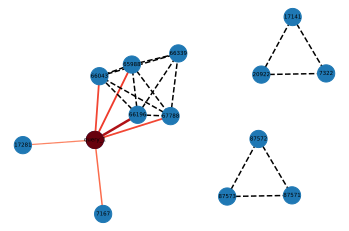

In [23]:
query_node_test_G = [node for node in test_G.nodes if isinstance(node, str) and 'query' in node][0]
nodes_test_G = [node for node in test_G.nodes if not node == query_node_test_G]
for node_v in nodes_test_G:
    print(node_v, tr_node(node_v, test_G))

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
plot_graph(test_G, tan_cutoff = 0.6, attribute_key = 's2v_score', cutoff = 0.4, node_labels = True)

In [24]:
topn = 20
nn_tested_tanimoto_top20_new_and_unique2_found_matches_s2v_transmission = []
for ID in range(len(nn_tested_tanimoto_top20_new_and_unique2_found_matches_s2v)):
    print(ID)
    current = nn_tested_tanimoto_top20_new_and_unique2_found_matches_s2v[ID]\
                             .sort_values('s2v_score',ascending=False).iloc[:topn].copy()
    test_graph = matches2network(ID, current)
    test_graph = add_library_connections(test_graph, similarity_matrices_new_and_unique2[ID],
                                     current.index)
    query_node_test_graph = [node for node in test_graph.nodes if isinstance(node, str) and 'query' in node][0]
    nodes_test_graph = [node for node in test_graph.nodes if not node == query_node_test_graph]
    transms = []
    for node_v in nodes_test_graph:
        transms.append(tr_node(node_v, test_graph))
    current['transmission'] = transms
    nn_tested_tanimoto_top20_new_and_unique2_found_matches_s2v_transmission.append(current)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999


In [25]:
nn_tested_tanimoto_top20_new_and_unique2_found_matches_s2v_transmission[-1]

,cosine_score,cosine_matches,mod_cosine_score,mod_cosine_matches,s2v_score,label,similarity,parent_mass,mass_sim,sim_predictions,guess_within_thresh,transmission
88899,0.961584,0.398299,0.961584,0.398299,0.594041,0,0.801318,0.025791,9.991078e-01,0.814690,[True],1.076349
10689,0.964711,0.440418,0.964711,0.440418,0.538090,0,0.672741,0.049945,3.901854e-32,0.446978,[False],0.567731
88901,0.712905,0.549896,0.712905,0.549896,0.532242,0,0.801318,0.025791,9.991078e-01,0.826895,[True],1.179347
21137,0.029431,0.824777,0.723956,0.936562,0.530011,0,0.990426,0.026835,4.386286e-02,0.750216,[False],1.133517
10533,0.921019,0.686868,0.921019,0.686868,0.525521,0,0.659514,0.051883,1.175322e-34,0.527571,[False],0.509053
10055,0.011160,0.748130,0.609538,0.848450,0.518884,0,0.808000,0.024599,2.815378e-02,0.680828,[False],1.039611
9376,0.042337,0.782158,0.521329,0.878099,0.508976,0,0.911266,0.025643,6.424324e-01,0.514842,[False],1.237986
72674,0.007471,0.748130,0.732235,0.936562,0.497434,0,0.314925,0.024599,2.815378e-02,0.720831,[False],-1.918905
10908,0.032687,0.926652,0.033726,0.921132,0.496332,0,0.886957,0.026835,4.386286e-02,0.509413,[False],1.406766
9201,0.027940,0.936562,0.663494,0.936562,0.489888,0,0.872832,0.026835,4.386286e-02,0.730985,[False],1.409567


In [26]:
tans = []
transms = []
for res in nn_tested_tanimoto_top20_new_and_unique2_found_matches_s2v_transmission:
    tans.extend(res['similarity'])
    transms.extend(res['transmission'])

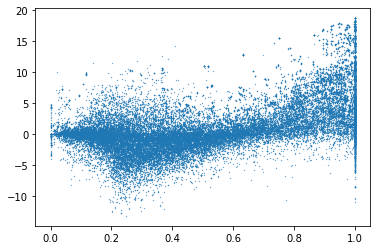

In [30]:
set_matplotlib_formats('png')
plt.scatter(tans, transms, s = 0.08)

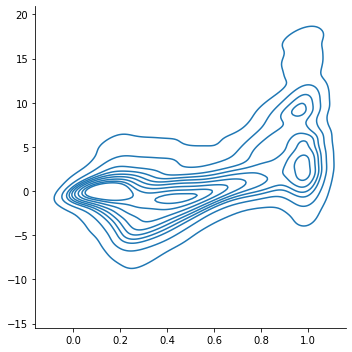

In [29]:
import seaborn as sns
g = sns.displot(x=tans, y=transms, kind="kde")#, rug=True)